## Data Description

Dataset: Greenhouse gas giants

Carbon Majors Data has the following features:

- Open Source: The data is available for download as CSV files for non-commercial use. InfluenceMap's Terms and Conditions apply.

- Annual Updates: The data is updated annually in November, and the downloads represent the latest available data.

Levels of Data Granularity:

1. Low Granularity: Includes year, entity, entity type, and total emissions.

2. Medium Granularity: Includes year, entity, entity type, commodity, commodity production, commodity unit, and total emissions.

3. High Granularity: Includes the same fields as the medium granularity file, as well as the reporting entity, data point source, product emissions, and four different operational emissions: flaring, venting, own fuel use, and fugitive methane.

=> Choose emissions_medium_granularity file


## Data Discovery

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### ***Common data infomation***

In [4]:
raw = pd.read_csv("emissions_medium_granularity.csv")
print(f"Total raw data: {raw.shape}\n")
raw.head(5)

Total raw data: (12551, 7)



,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


Dataset has 12551 examples and 7 features

Explain features:
- year: The year of the data point
- parent_entity: The entity to whom the emissions are traced to (fuel distributor,fuel company,...)
- parent_type: investor-owned company/state-owned entity/nation state.
- commodity
- production_value: The quantity of production
- production_unit: The unit of production
- total_emissions_MtCO2e: The total emissions

In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


Explain: The dataset has no null values.

In [29]:
# Show the amount of unique value in each column
dataset_without_total_column = raw.drop(columns=["total_emissions_MtCO2e","production_value"])
for column in dataset_without_total_column.columns:
    unique_value = dataset_without_total_column[column].unique()
    num_unique = len(unique_value)
    print(f"{column}: {num_unique} unique values")
    if num_unique < 10:
        print(unique_value)
    print("\n")

year: 169 unique values


parent_entity: 122 unique values


parent_type: 3 unique values
['State-owned Entity' 'Investor-owned Company' 'Nation State']


commodity: 9 unique values
['Oil & NGL' 'Natural Gas' 'Sub-Bituminous Coal' 'Metallurgical Coal'
 'Bituminous Coal' 'Thermal Coal' 'Anthracite Coal' 'Cement'
 'Lignite Coal']


production_unit: 4 unique values
['Million bbl/yr' 'Bcf/yr' 'Million tonnes/yr' 'Million Tonnes CO2']




Explain: The dataset contains information about various entities involved in the production of different commodities. 
- There are 122 unique parent entities categorized into three types: State-owned Entity, Investor-owned Company, and Nation State. 
- These entities produce nine different commodities, including Oil & NGL, Natural Gas, and various types of coal such as Sub-Bituminous Coal, Metallurgical Coal, and Bituminous Coal, as well as Cement and Lignite Coal. 
- The production units used to measure these commodities are Million bbl/yr, Bcf/yr, Million tonnes/yr, and Million Tonnes CO2.

### ***The quantity of Production based on Commodity***

In [3]:
# Calculate the total amount of production value of each commodity
group_data_by_commodity = raw.groupby(raw['commodity'])['production_value'].sum().reset_index()
print(group_data_by_commodity)

             commodity  production_value
0      Anthracite Coal      1.627872e+04
1      Bituminous Coal      1.218675e+05
2               Cement      5.663804e+04
3         Lignite Coal      3.187816e+04
4   Metallurgical Coal      2.951517e+04
5          Natural Gas      3.555407e+06
6            Oil & NGL      1.324404e+06
7  Sub-Bituminous Coal      2.466162e+04
8         Thermal Coal      1.930153e+04


Natural gas and oil & NGL have significantly higher total production compared to other products, so using a logarithmic scale makes it easier to observe while maintaining the order of product production and changing the colors for better aesthetics.

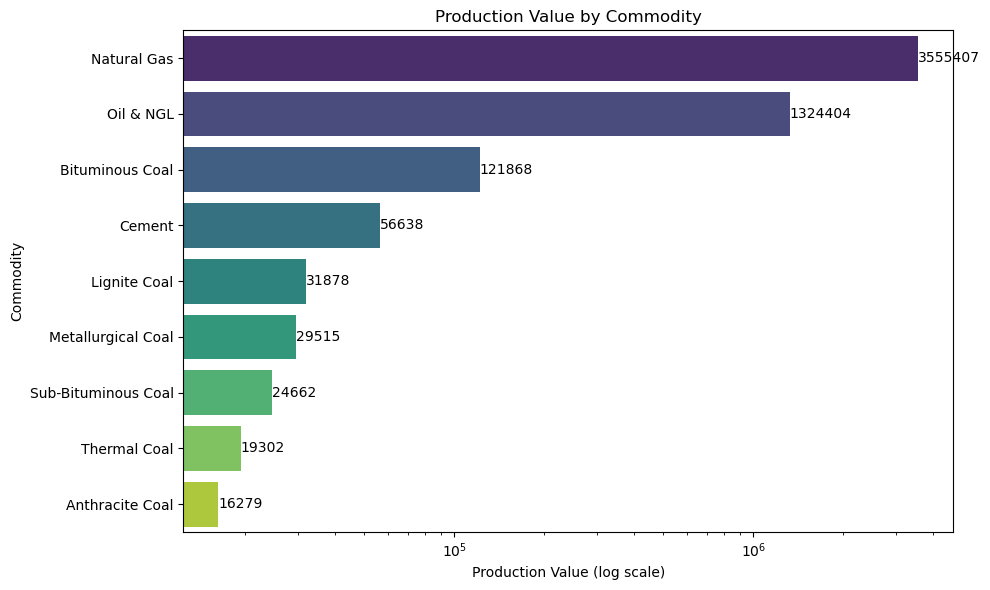

In [6]:
data_sorted = group_data_by_commodity.sort_values(by="production_value", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='production_value', y='commodity', data=data_sorted, palette='viridis')

plt.xscale('log')
plt.xlabel('Production Value (log scale)')
plt.ylabel('Commodity')
plt.title('Production Value by Commodity')

for index, value in enumerate(data_sorted['production_value']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.tight_layout()
plt.show()

Explain: 
- Natural Gas has the highest production value by far, amounting to approximately 3.56 million units. This suggests that Natural Gas is a critical commodity in terms of production value.
- Oil & NGL (Natural Gas Liquids) also shows a high production value at approximately 1.32 million units, indicating its substantial role in the commodity market.
- Among the different types of coal, Bituminous Coal has the highest production value at approximately 121,867 units. This highlights its significant contribution compared to other coal types.

### ***Total Production Value by Year for Each Parent Entity***

In [25]:
group_data_by_year_and_parent_entity = raw.pivot_table(values = ["production_value", "total_emissions_MtCO2e"], index = ["year","parent_entity"], aggfunc = "sum").reset_index()
print(group_data_by_year_and_parent_entity)

      year        parent_entity  production_value  total_emissions_MtCO2e
0     1854  Westmoreland Mining          0.051005                0.099198
1     1855  Westmoreland Mining          0.066326                0.128996
2     1856  Westmoreland Mining          0.081647                0.158793
3     1857  Westmoreland Mining          0.094906                0.184580
4     1858  Westmoreland Mining          0.108165                0.210367
...    ...                  ...               ...                     ...
6064  2022  Westmoreland Mining          9.863013               19.172732
6065  2022      Whitehaven Coal         16.117000               40.594298
6066  2022      Wolverine Fuels          5.828721               15.819960
6067  2022      Woodside Energy        692.090000               64.785761
6068  2022                  YPF        521.000000               69.912869

[6069 rows x 4 columns]


In [41]:
fig = px.line(group_data_by_year_and_parent_entity, x='year', y='production_value', color='parent_entity', title='Total Production Value by Year for Each Parent Entity')
fig.show()

### ***Compare Total Production Value and Emissions over Years by Parent Type***

In [5]:
group_data_by_year_and_parent_entity = raw.pivot_table(values = ["production_value"], index = ["year","parent_type"], aggfunc = "sum").reset_index()
print(group_data_by_year_and_parent_entity)

     year             parent_type  production_value
0    1854  Investor-owned Company          0.051005
1    1855  Investor-owned Company          0.066326
2    1856  Investor-owned Company          0.081647
3    1857  Investor-owned Company          0.094906
4    1858  Investor-owned Company          0.108165
..    ...                     ...               ...
382  2021            Nation State       7337.580456
383  2021      State-owned Entity      87301.855562
384  2022  Investor-owned Company      48009.501719
385  2022            Nation State       7398.494201
386  2022      State-owned Entity      87518.378738

[387 rows x 3 columns]


In [59]:
fig = px.line(
                group_data_by_year_and_parent_entity, x='year', y='production_value',
                color='parent_type', line_group='parent_type',
                title='Total Production Value over Years by Parent Type',
                labels={'year': 'Year', 'production_value': 'Production Value', 'parent_type': 'Parent Type'}
            )

fig.show()

In [14]:
group_data_by_year_and_parent_entity = raw.pivot_table(values=["total_emissions_MtCO2e"], 
                                                        index = ["year","parent_type"], 
                                                        aggfunc = "sum").reset_index()
fig = px.line(group_data_by_year_and_parent_entity, x='year', y='total_emissions_MtCO2e',
                color='parent_type', line_group='parent_type',
                title='Total Emissions over Years by Parent Type',
                labels={'year': 'Year', 'value': 'Value', 'parent_type': 'Parent Type', 'variable': 'Metric'})

fig.show()

In [13]:
group_data_by_year_and_parent_entity = raw.pivot_table(values=['production_value', 'total_emissions_MtCO2e'], 
                                                        index = ["year","parent_type"], 
                                                        aggfunc = "sum").reset_index()
fig = px.bar(group_data_by_year_and_parent_entity, x='parent_type', y=['production_value', 'total_emissions_MtCO2e'],
            barmode='group', title='Comparison of Production Value and Total Emissions by Parent Type',
            labels={'parent_type': 'Parent Type', 'value': 'Value', 'variable': 'Metric'})

fig.show()

Explain: 

Most energy companies are state-controlled due to the importance of energy security. A nation typically needs to ensure three types of security: food security, national defense, and energy security to maintain overall sovereignty. Therefore, it is understandable that state-owned enterprises comprise more than 50% of the sector.

### ***Average global Fossil Fuels and Mineral production and CO2 emission over years***

In [11]:
# Create pivot mean table
data_pvt = raw.pivot_table(values = ["production_value", "total_emissions_MtCO2e"], index = "year", aggfunc = "mean").reset_index()
data_pvt.head()

,year,production_value,total_emissions_MtCO2e
0,1854,0.017002,0.033066
1,1855,0.022109,0.042999
2,1856,0.027216,0.052931
3,1857,0.031635,0.061527
4,1858,0.036055,0.070122


In [49]:
data_melted = pd.melt(data_pvt, id_vars=['year'], value_vars=['production_value', 'total_emissions_MtCO2e'], var_name='variable', value_name='value')
fig = px.line(data_melted, x='year', y='value', color='variable', title='Avg. global Fossil Fuels and Mineral production & CO2 emissions over the years')

fig.update_layout(
                    xaxis_title='Year',
                    yaxis_title='Mean Value',
                    legend_title_text='Variable',
                    template='plotly_white',
                    title_x=0.5
                )

fig.show()

*** The correlation ***: 

The total production of Fossil Fuels and Mineral is directly proportional to the amount of CO2 emissions, but the correlation between these two factors varies from year to year. Specifically, Fossil Fuels and Mineral production increases rapidly over time, while CO2 emissions increase but at a much slower pace. 

There could be several different reasons:

- Increased energy efficiency
- Energy conversion and the use of alternative fuels
- Carbon Capture and Storage (CCS)
- Environmental policies and regulations
- Structural changes in the energy industry

*** The growth rate ***:
- The Fossil Fuels and Mineral production began to increase around the 1880s following the establishment of Edison's electric company, Edison Electric Light Company, in 1882.
- During the oil crises of 1973-1974 and 1979-1980, the decrease in oil production and price hikes led to a significant decline in ONGL production in the 1970s. After a period of instability, production began to stabilize and increase again. During this time, CO2 emissions also decreased. In 1997, countries that signed the Kyoto Protocol committed to reducing greenhouse gas emissions. Additionally, advancements in machinery efficiency and the emergence of new technologies contributed to a significant reduction in CO2 emissions.
- 2008-2009 Global Financial Crisis: The global financial crisis resulted in a decrease in energy demand and reduced production across various energy sources, including oil and natural gas. Following a slight decline, production then rebounded rapidly.